# KNN Model

### Install Libraries
* **`wordcloud`** A word cloud generator in Python that we used to visualize our dataset

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [45]:
import numpy as np
import pandas as pd
import random
import re
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Loading Dataset

In [13]:
FILENAME = './HateSpeechDatasetBalanced.csv'
df = pd.read_csv(FILENAME)

print(f"Dataset shape: {df.shape}")
print(f"\nClass distribution:\n{df['Label'].value_counts()}")
print(f"\nFirst few rows:\n{df.head()}")

Dataset shape: (726119, 2)

Class distribution:
Label
1    364525
0    361594
Name: count, dtype: int64

First few rows:
                                             Content  Label
0  denial of normal the con be asked to comment o...      1
1  just by being able to tweet this insufferable ...      1
2  that is retarded you too cute to be single tha...      1
3  thought of a real badass mongol style declarat...      1
4                                afro american basho      1


### Cleaning dataset
* Remove punctuation
* Remove links
* Remove user mentions and hashtags
* Remove numbers
* Convert text to lowercase

In [14]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    return text

df['Content'] = df['Content'].apply(clean_text)
print("Dataset text cleaned.")

Dataset text cleaned.


### Exploratory Analysis of Dataset
* Histogram of words and their frequency of appearance

In [15]:
def word_frequencies(texts):
    frequencies = defaultdict(int)
    for text in texts:
        for word in text.split():
            frequencies[word.lower()] += 1
    return frequencies

all_texts = df['Content'].values
all_texts_frequencies = word_frequencies(all_texts)

hate_texts = df[df['Label'] == 1]['Content'].values
hate_texts_frequencies = word_frequencies(hate_texts)

nonhate_texts = df[df['Label'] == 0]['Content'].values
nonhate_texts_frequencies = word_frequencies(nonhate_texts)

print(f"\nTotal unique words in dataset: {len(all_texts_frequencies):,}")
print(f"Total unique words in hateful texts: {len(hate_texts_frequencies):,}")
print(f"Total unique words in non-hateful texts: {len(nonhate_texts_frequencies):,}")


Total unique words in dataset: 136,620
Total unique words in hateful texts: 58,546
Total unique words in non-hateful texts: 121,188


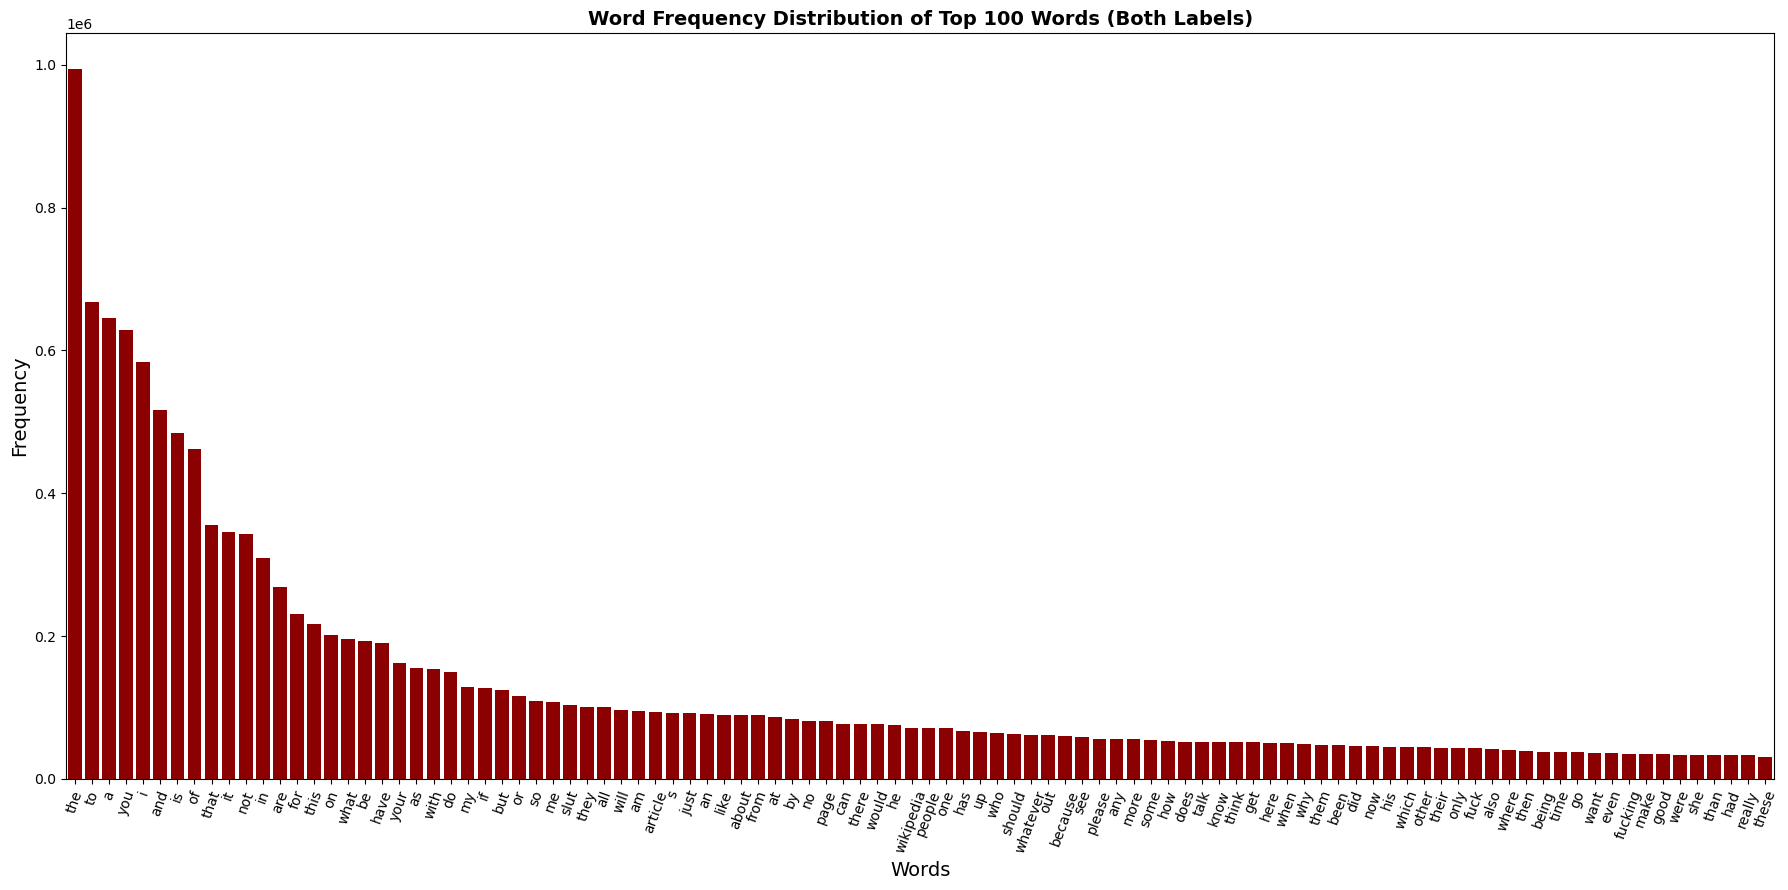

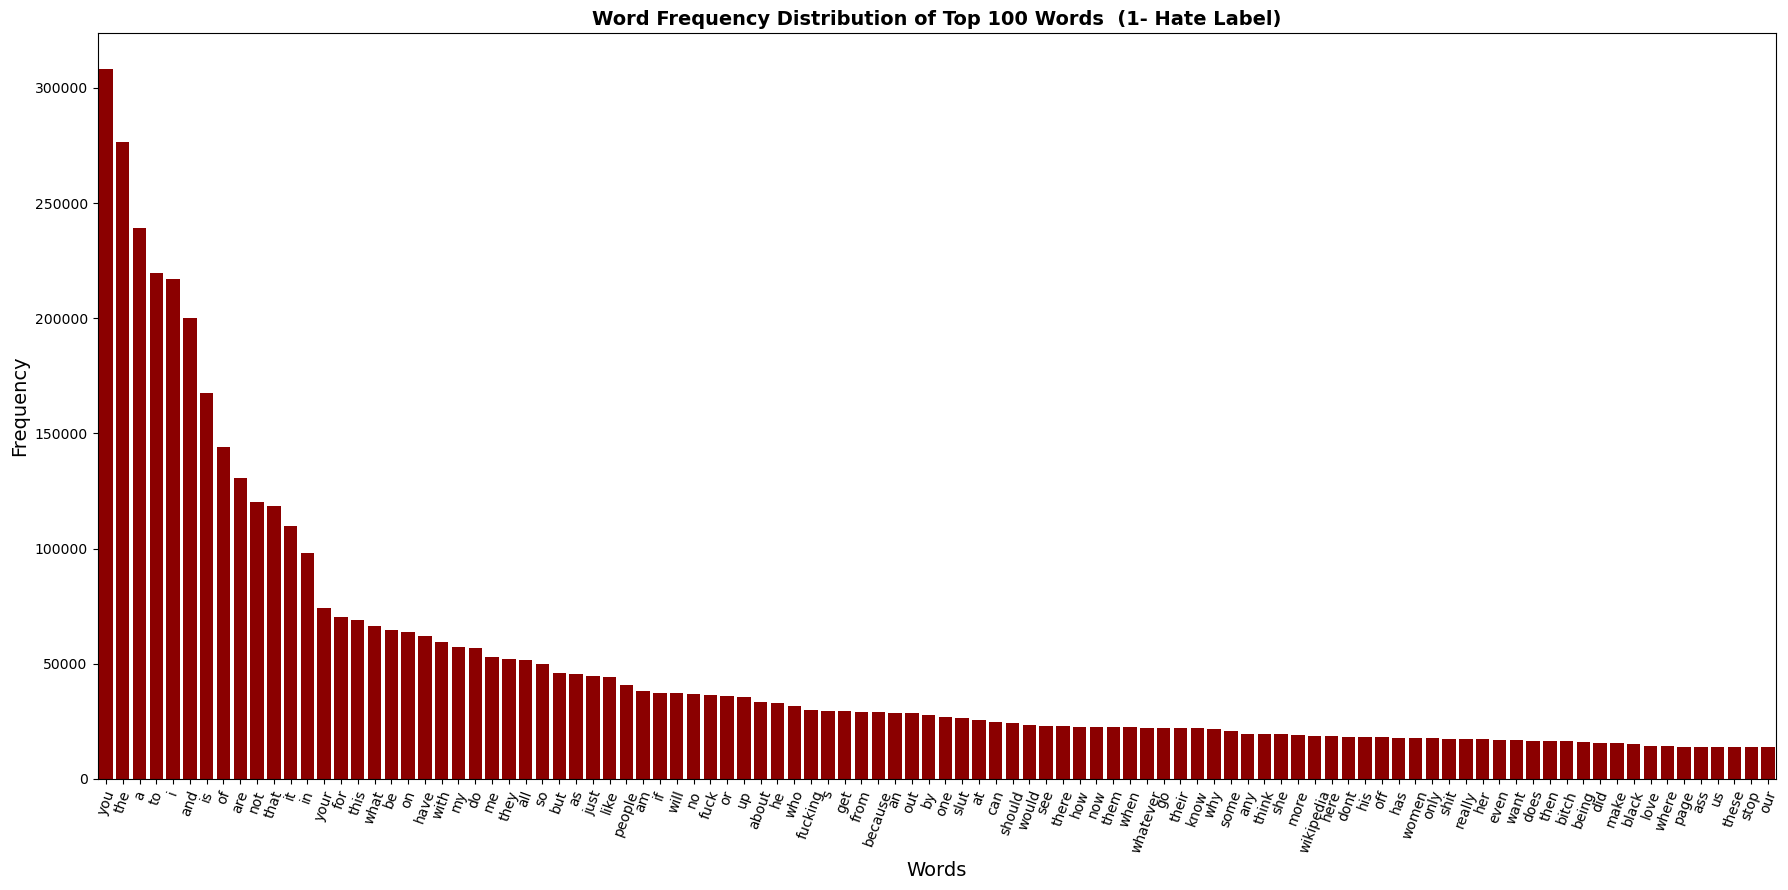

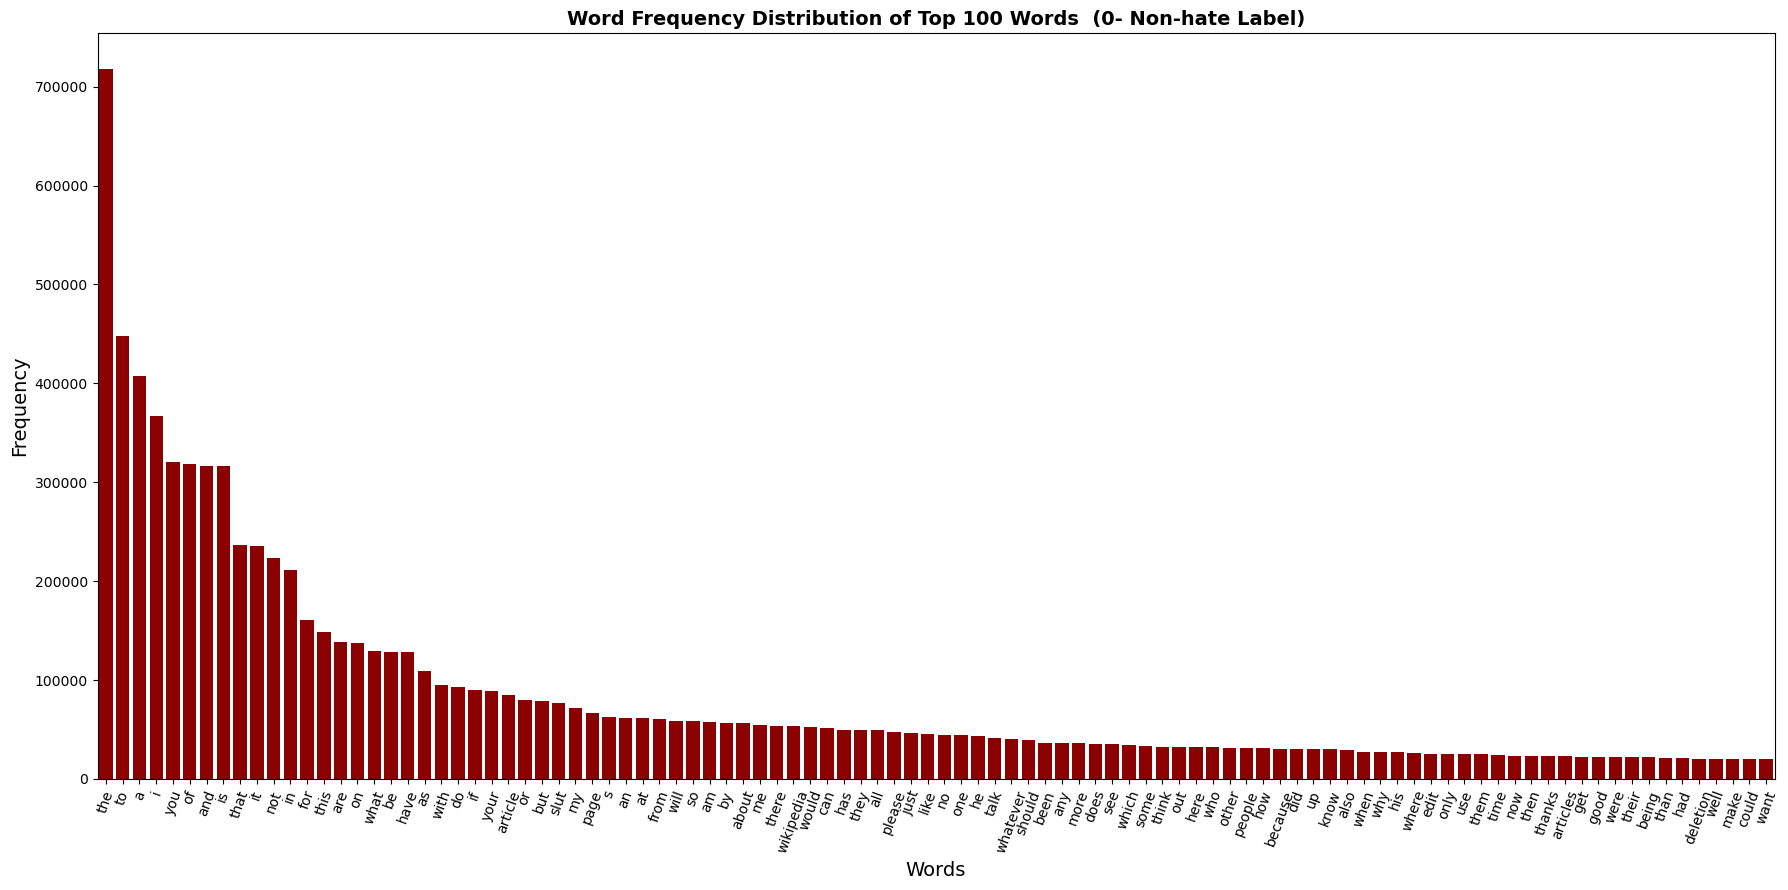

In [16]:
sorted_all = sorted(all_texts_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_all = sorted_all[:100] # Top 100 words
sorted_hate = sorted(hate_texts_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_hate = sorted_hate[:100] # Top 400 words
sorted_nonhate = sorted(nonhate_texts_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_nonhate = sorted_nonhate[:100] # Top 400 words

words = [ item[0] for item in sorted_all ]
counts = [ item[1] for item in sorted_all ]


plt.figure(figsize=(18, 9))
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Word Frequency Distribution of Top 100 Words (Both Labels)', fontsize=14, fontweight='bold')
plt.bar(words, counts, color='darkred')
plt.xlim(-0.5, len(words) - 0.5)
plt.xticks(rotation=70, ha='center')
plt.tight_layout()
plt.show()

words = [ item[0] for item in sorted_hate ]
counts = [ item[1] for item in sorted_hate ]

plt.figure(figsize=(18, 9))
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Word Frequency Distribution of Top 100 Words  (1- Hate Label)', fontsize=14, fontweight='bold')
plt.bar(words, counts, color='darkred')
plt.xlim(-0.5, len(words) - 0.5)
plt.xticks(rotation=70, ha='center')
plt.tight_layout()
plt.show()

words = [ item[0] for item in sorted_nonhate ]
counts = [ item[1] for item in sorted_nonhate ]

plt.figure(figsize=(18, 9))
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Word Frequency Distribution of Top 100 Words  (0- Non-hate Label)', fontsize=14, fontweight='bold')
plt.bar(words, counts, color='darkred')
plt.xlim(-0.5, len(words) - 0.5)
plt.xticks(rotation=70, ha='center')
plt.tight_layout()
plt.show()

* Histogram of the class distribution

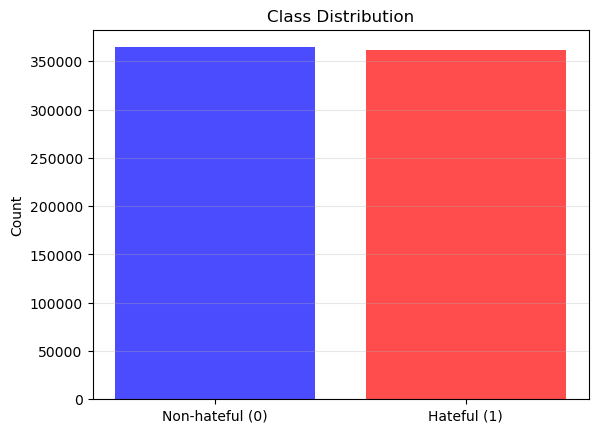

In [17]:
class_counts = df['Label'].value_counts()
plt.bar(['Non-hateful (0)', 'Hateful (1)'], class_counts.values, 
            color=['blue', 'red'], alpha=0.7)
plt.ylabel('Count')
plt.title('Class Distribution')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

* Histogram of length(number of words) in the text for each example

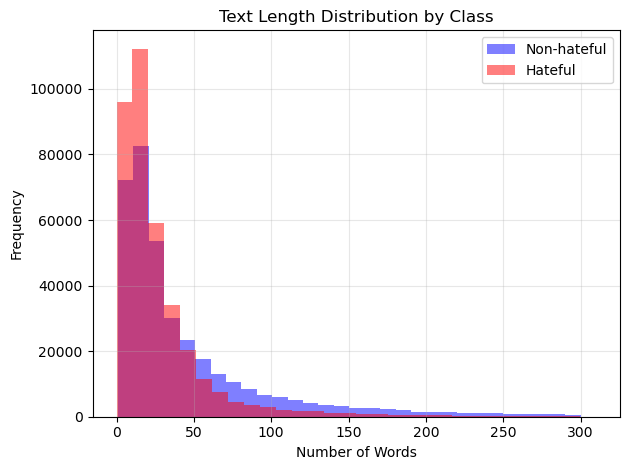

In [18]:
df['text_length'] = df['Content'].apply(lambda x: len(x.split()))


plt.hist(df[df['Label']==0]['text_length'], bins=30, alpha=0.5, 
             label='Non-hateful', color='blue')
plt.hist(df[df['Label']==1]['text_length'], bins=30, alpha=0.5, 
             label='Hateful', color='red')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Text Length Distribution by Class')
plt.legend()
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

* Word cloud for hateful text (label=1) and non-hateful text (label=0)

Text(0.5, 1.0, 'Non-hate Speech Word Cloud')

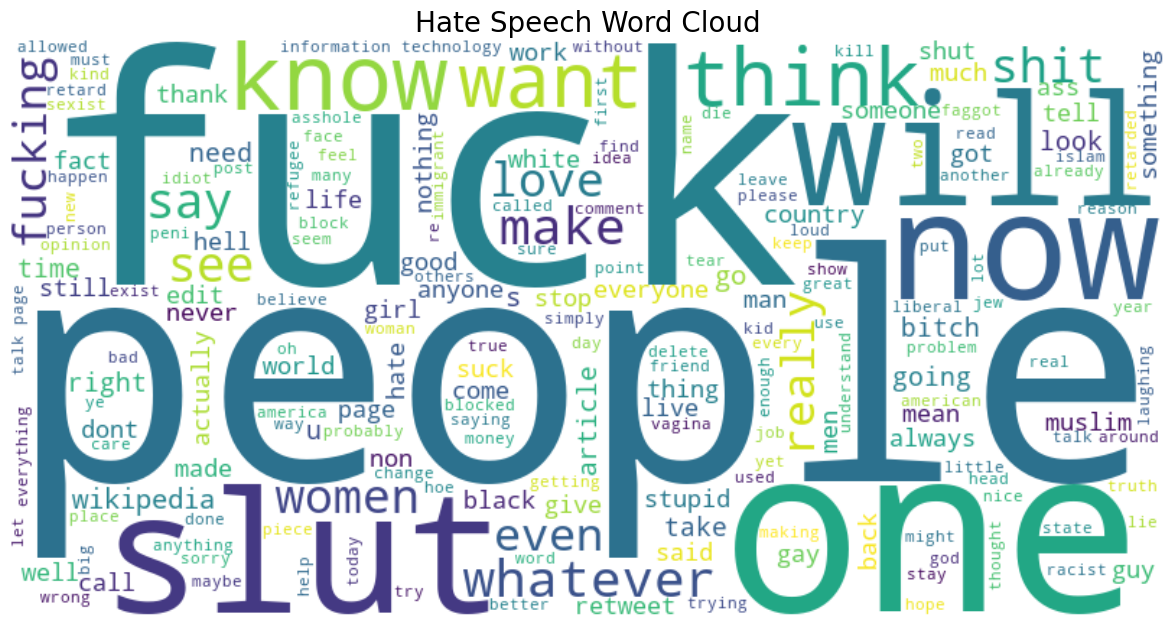

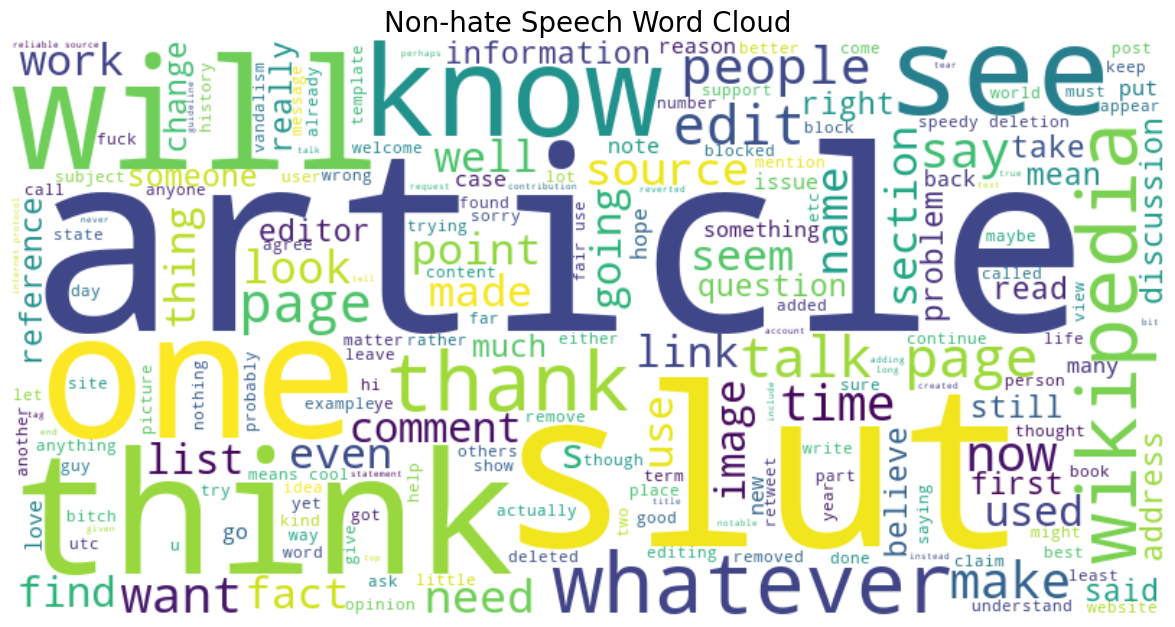

In [19]:
nonhate_wordcloud = ' '.join(df[df['Label'] == 0]['Content'].values)
hate_wordcloud = ' '.join(df[df['Label'] == 1]['Content'].values) 

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(hate_wordcloud)
plt.figure(figsize=(15, 7.5))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Hate Speech Word Cloud", fontsize=20)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(nonhate_wordcloud)
plt.figure(figsize=(15, 7.5))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Non-hate Speech Word Cloud", fontsize=20)

### Preprocessing the Data
* Get 5000 examples from each class for the model
* Get rid of words that have less than 100 occurrences in the training set and test (based on the training set in order to prevent cheating)
* Turn into a bag of words using one-hot encoding
* Create Train/Test split for data

In [43]:

# Only use 5000 samples from each class for modeling
df_class_0 = df.query('Label == 0').sample(5000, random_state=42)
df_class_1 = df.query('Label == 1').sample(5000, random_state=42)
data = pd.concat([df_class_0, df_class_1])

X_text = data['Content'].values
y = data['Label'].values   

X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.4, random_state=42)

# Create vocabulary from training data only
train_all_words = []
for text in X_train:
    words = str(text).lower().split()
    train_all_words.extend(words)

train_word_counts = Counter(train_all_words)
print(f"Total unique words in training data: {len(train_word_counts):,}")

MIN_WORD_FREQ = 100

# Identify frequent words (appear at least MIN_WORD_FREQ times)
freq_words = set([word for word, freq in train_word_counts.items() if freq >= MIN_WORD_FREQ])


def filter_rare_words(text, frequent_words_set):
    words = str(text).split()
    # Keep only words that are in the frequent_words set
    filtered_words = [word for word in words if word in frequent_words_set]
    return ' '.join(filtered_words)

# Apply filtering
X_train_filtered = np.array([filter_rare_words(text, freq_words) for text in X_train])
X_test_filtered = np.array([filter_rare_words(text, freq_words) for text in X_test])
print("Rare words removed from training and test set.")

# One-hot encoding function
def text_to_vector(text, word_to_index, vocab_size):
    vector = np.zeros(vocab_size, dtype=np.int8)
    
    words = str(text).split()
    for word in words:
        if word in word_to_index:
            idx = word_to_index[word]
            vector[idx] = 1  # Binary: word present or not
    
    return vector


# Create word for index mapping for one-hot encoding
train_all_text_filtered = ' '.join(X_train_filtered)
vocabulary = sorted(set(train_all_text_filtered.split()))
word_to_index = {word: idx for idx, word in enumerate(vocabulary)}
print(f"One hot encoding mapping: {word_to_index}")

# Convert train and test to one-hot vectors
print("Converting training texts to vectors...")
X_train_onehot = np.array([
    text_to_vector(text, word_to_index, len(vocabulary)) 
    for text in X_train_filtered
])
print("Done.")

print("Converting test texts to vectors...")
X_test_onehot = np.array([
    text_to_vector(text, word_to_index, len(vocabulary)) 
    for text in X_test_filtered
])
print("Done.")



Total unique words in training data: 17,378
Rare words removed from training and test set.
One hot encoding mapping: {'a': 0, 'about': 1, 'actually': 2, 'address': 3, 'after': 4, 'again': 5, 'against': 6, 'all': 7, 'already': 8, 'also': 9, 'always': 10, 'am': 11, 'an': 12, 'and': 13, 'another': 14, 'any': 15, 'anyone': 16, 'anything': 17, 'are': 18, 'around': 19, 'article': 20, 'articles': 21, 'as': 22, 'ass': 23, 'at': 24, 'back': 25, 'be': 26, 'because': 27, 'been': 28, 'before': 29, 'being': 30, 'believe': 31, 'better': 32, 'big': 33, 'bitch': 34, 'black': 35, 'blocked': 36, 'bullshit': 37, 'but': 38, 'by': 39, 'call': 40, 'can': 41, 'cannot': 42, 'come': 43, 'could': 44, 'country': 45, 'day': 46, 'deleted': 47, 'deletion': 48, 'did': 49, 'discussion': 50, 'do': 51, 'does': 52, 'done': 53, 'dont': 54, 'down': 55, 'edit': 56, 'editing': 57, 'edits': 58, 'else': 59, 'even': 60, 'ever': 61, 'every': 62, 'everyone': 63, 'face': 64, 'fact': 65, 'feel': 66, 'find': 67, 'first': 68, 'for':

### KNN with no Feature Transforamtion

In [48]:
# Implement KNN using Sklearn
print(f"Final Training Shape: {X_train_onehot.shape}")
print(f"Final Testing Shape: {X_test_onehot.shape}")

knn = KNeighborsClassifier(n_neighbors=5)

print("Fitting model...")
knn.fit(X_train_onehot, y_train)

print("Predicting...")
y_pred_test = knn.predict(X_test_onehot)
y_pred_train = knn.predict(X_train_onehot)

# Evaluate
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')

print("\n--- Results ---")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"f1 score: {f1:.4f}")

Final Training Shape: (6000, 246)
Final Testing Shape: (4000, 246)
Fitting model...
Predicting...

--- Results ---
Train Accuracy: 0.7602
Test Accuracy: 0.5972
Precision: 0.5812
Recall: 0.6102
f1 score: 0.5953


### KNN with no Feature Transformation (Hyperparameter Tuning)

In [51]:
# Hyperparameter to consider
# Number of neighbors (k): Smaller k -> more sensitive to noise, larger k -> smoother decision boundary

neighbors_options = [1, 5, 9, 15, 21, 31]

for k in neighbors_options:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_onehot, y_train)
    y_pred_test = knn.predict(X_test_onehot)
    y_pred_train = knn.predict(X_train_onehot)

    # Evaluate
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')

    print(f"\n--- Results for k={k} ---")
    print(f"Train Accuracy: {train_acc:.4f}", end=', ')
    print(f"Test Accuracy: {test_acc:.4f}", end=', ')
    print(f"Precision: {prec:.4f}", end=', ')
    print(f"Recall: {rec:.4f}", end=', ')
    print(f"f1 score: {f1:.4f}")


--- Results for k=1 ---
Train Accuracy: 0.9827, Test Accuracy: 0.5820, Precision: 0.5693, Recall: 0.5711, f1 score: 0.5702

--- Results for k=5 ---
Train Accuracy: 0.7602, Test Accuracy: 0.5972, Precision: 0.5812, Recall: 0.6102, f1 score: 0.5953

--- Results for k=9 ---
Train Accuracy: 0.7220, Test Accuracy: 0.6088, Precision: 0.5914, Recall: 0.6282, f1 score: 0.6092

--- Results for k=15 ---
Train Accuracy: 0.6943, Test Accuracy: 0.6135, Precision: 0.5926, Recall: 0.6524, f1 score: 0.6211

--- Results for k=21 ---
Train Accuracy: 0.6838, Test Accuracy: 0.6185, Precision: 0.5951, Recall: 0.6704, f1 score: 0.6305

--- Results for k=31 ---
Train Accuracy: 0.6725, Test Accuracy: 0.6132, Precision: 0.5861, Recall: 0.6921, f1 score: 0.6347
